JSPEC (JLab Simulation Package for Electron Cooling) was developed by De. He Zhang at Jefferson Lab. The more about the codding can be found at [JSPEC](https://github.com/JeffersonLab/ElectronCooling)

### This file is to plot emittance growth after cooling in JSPEC simulation.
He Zhnag: Interaction time betwenn proton beam and electron beam is given by

Interaction time  = total time (hrs) in simulation * cooler length/ring circumference

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("cool2.txt",sep="\s+",skiprows = [0,1,3,4])
df

,t,emit_x,emit_y,dp/p
0,0.00,0.000003,4.500000e-07,0.000660
1,1.08,0.000003,4.497735e-07,0.000662
2,2.16,0.000003,4.495446e-07,0.000656
3,3.24,0.000003,4.495644e-07,0.000655
4,4.32,0.000003,4.494804e-07,0.000659
...,...,...,...,...
9996,10795.68,0.000007,4.963973e-07,0.000620
9997,10796.76,0.000007,4.964953e-07,0.000613
9998,10797.84,0.000007,4.965041e-07,0.000624
9999,10798.92,0.000007,4.965375e-07,0.000621


In [3]:
for ind, row in df.iterrows():
    df.loc[ind,"time"] = row["t"]/3600
for ind, row in df.iterrows():
    df.loc[ind,"emitx"] = row["emit_x"]*1000000
for ind, row in df.iterrows():
    df.loc[ind,"emity"] = row["emit_y"]*1000000

In [4]:
df

,t,emit_x,emit_y,dp/p,time,emitx,emity
0,0.00,0.000003,4.500000e-07,0.000660,0.0000,2.800000,0.450000
1,1.08,0.000003,4.497735e-07,0.000662,0.0003,2.799666,0.449773
2,2.16,0.000003,4.495446e-07,0.000656,0.0006,2.799306,0.449545
3,3.24,0.000003,4.495644e-07,0.000655,0.0009,2.798567,0.449564
4,4.32,0.000003,4.494804e-07,0.000659,0.0012,2.799090,0.449480
...,...,...,...,...,...,...,...
9996,10795.68,0.000007,4.963973e-07,0.000620,2.9988,7.325192,0.496397
9997,10796.76,0.000007,4.964953e-07,0.000613,2.9991,7.326791,0.496495
9998,10797.84,0.000007,4.965041e-07,0.000624,2.9994,7.327766,0.496504
9999,10798.92,0.000007,4.965375e-07,0.000621,2.9997,7.328974,0.496538


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

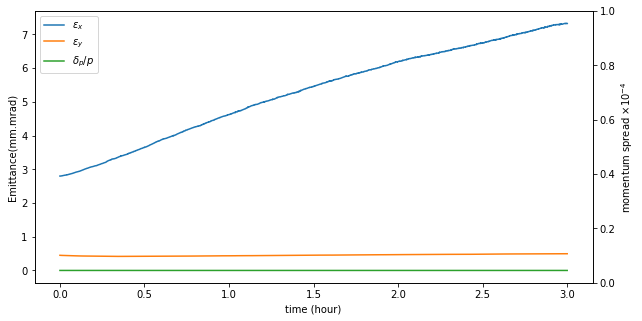

In [8]:
#fig, ax1 = plt.subplots()
ax1 = df.plot(x = 'time',y=['emitx','emity','dp/p'],kind="line",figsize=(10,5))
ax1.set_xlabel('time (hour)')
ax1.set_ylabel('Emittance(mm.mrad)')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'momentum spread $ \times 10^{-4}$')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
ax1.legend(['$\epsilon_x$','$\epsilon_y$','$\delta_{p}/p$'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("phase-space.pdf")
plt.show()